In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
# Load dataset
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

In [16]:
# Convert 'TotalCharges' to numeric and handle missing values safely
df = df.copy()  # Avoid SettingWithCopyWarning
df.loc[:, "TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0)

# Encode target variable: Churn (Yes -> 1, No -> 0)
df = df.copy()  # Ensure we're working with a new object
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [17]:
# Select relevant features
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
categorical_features = ["gender", "SeniorCitizen", "Partner", "Dependents",
                        "PhoneService", "MultipleLines", "InternetService",
                        "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                        "TechSupport", "StreamingTV", "StreamingMovies",
                        "Contract", "PaperlessBilling", "PaymentMethod"]

# Split dataset
X = df[numerical_features + categorical_features]
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# Preprocessing: Standardize numerical features, OneHotEncode categorical features
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Define models with pipelines
logreg = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=500))
])

dtc = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=5, random_state=42))
])

rf = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [19]:
# Train models
logreg.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_dtc = dtc.predict(X_test)
y_pred_rf = rf.predict(X_test)

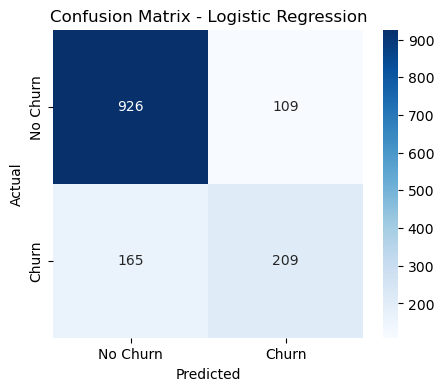

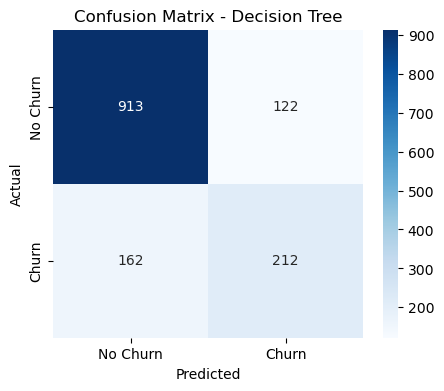

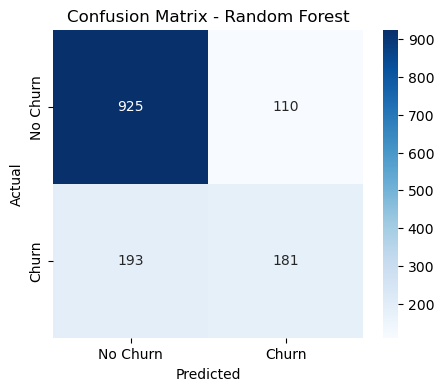


=== Logistic Regression Report ===
               precision    recall  f1-score      support
0              0.848763  0.894686  0.871119  1035.000000
1              0.657233  0.558824  0.604046   374.000000
accuracy       0.805536  0.805536  0.805536     0.805536
macro avg      0.752998  0.726755  0.737583  1409.000000
weighted avg   0.797924  0.805536  0.800228  1409.000000

=== Decision Tree Report ===
               precision    recall  f1-score      support
0              0.849302  0.882126  0.865403  1035.000000
1              0.634731  0.566845  0.598870   374.000000
accuracy       0.798439  0.798439  0.798439     0.798439
macro avg      0.742016  0.724485  0.732136  1409.000000
weighted avg   0.792347  0.798439  0.794655  1409.000000

=== Random Forest Report ===
               precision    recall  f1-score      support
0              0.827370  0.893720  0.859266  1035.000000
1              0.621993  0.483957  0.544361   374.000000
accuracy       0.784954  0.784954  0.784954   

In [20]:
# Evaluation metrics
logreg_report = classification_report(y_test, y_pred_logreg, output_dict=True)
dtc_report = classification_report(y_test, y_pred_dtc, output_dict=True)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

# Function to plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_dtc, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# Convert classification reports to DataFrames
logreg_df = pd.DataFrame(logreg_report).transpose()
dtc_df = pd.DataFrame(dtc_report).transpose()
rf_df = pd.DataFrame(rf_report).transpose()

# Save reports to CSV files for later use
logreg_df.to_csv("logistic_regression_report.csv", index=True)
dtc_df.to_csv("decision_tree_report.csv", index=True)
rf_df.to_csv("random_forest_report.csv", index=True)

# Print reports in a readable format
print("\n=== Logistic Regression Report ===\n", logreg_df)
print("\n=== Decision Tree Report ===\n", dtc_df)
print("\n=== Random Forest Report ===\n", rf_df)